# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

<b> Импортируем библиотеки </b>

In [1]:
import pandas as pd
import math
import sklearn
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error, make_scorer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
pd.set_option("display.max_columns", 87)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')

data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')

In [3]:
# функция для изучения датафреймов
def research(data):

    display(data.head())
    print(data.info()) 
    display(data.describe())
    print('дубликаты', data.duplicated().sum())

In [4]:
research(data_full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

дубликаты 0


In [5]:
research(data_train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

дубликаты 0


In [6]:
research(data_test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20

дубликаты 0


<b> Вывод: </b>

В предоставляемых выборках имеются параметры сырья, реагентов, размер гранул, скорость подачи поступающего на флоатационную установку.

Уровень жидкости и объем воздуха для каждой флоатационной установки.
Выходные параметры продукта и отвальные хвосты для этапов флоатации, первичной и вторичной очистки. Некоторые расчетные характеристики.

Эффективность обогащения чернового и финального концентрата.

В тестовой выборке отсутствуют выходные параметры продукта для этапов флоатации, первичной и вторичной очистки. Соседние по времени параметры часто похожи. Поэтому заполним пропуски методом .ffill.

<b> Провекра эффективности обогащения </b>

Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака <b>rougher.output.recovery</b>. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

Для расчета Recovery будем использовать следующие признаки:

C — rougher.output.concentrate_au F — rougher.input.feed_au T — rougher.output.tail_au.

In [7]:
train_temp = data_train.copy(deep=True)
C = train_temp['rougher.output.concentrate_au']
F = train_temp['rougher.input.feed_au']
T = train_temp['rougher.output.tail_au']
train_temp['rougher.output.recovery.checked'] = (C * (F - T)) / (F * (C - T)) * 100
train_temp.dropna(inplace=True)
print('MAE:', mean_absolute_error(train_temp['rougher.output.recovery'], train_temp['rougher.output.recovery.checked']))

MAE: 9.82970122149377e-15


Вывод:

Ошибка очень маленькая, эффективность обогащения рассчитана правильно.

<b> Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся? </b>

Определим отсутствующие признаки

In [8]:
set(data_train) - set(data_test)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

<b> Вывод: </b>
    
В тестовой выборке отсутствуют выходные параметры продукта: output-параметры продукта и calculation -расчётные характеристики.

Параметры недоступны, по причине замеров и/или рассчетов значительно позже.

Отсутствуют целевые признаки: тrougher.output.recovery и final.output.recovery. 

Их можно восстановить из full

Тип данных отсутствующих признаков: float64.

<b> Предобработка данных </b>

 <b> Full </b>

In [9]:
# заполним пропуски features
full_target_rougher = data_full['rougher.output.recovery']
full_target_final = data_full['final.output.recovery']
full_features = data_full.drop(['final.output.recovery','rougher.output.recovery'], axis=1)
full_features.ffill(axis=0,inplace=True)

# добавляем их обратно и сбросим пропуски у целевых
full_features['rougher.output.recovery'] = full_target_rougher
full_features['final.output.recovery'] = full_target_final
full = full_features.dropna()
full.reset_index(inplace=True, drop = True)

<b> Train </b>

In [10]:
train_target_rougher = data_train['rougher.output.recovery']
train_target_final = data_train['final.output.recovery']
train_features = data_train.drop(['final.output.recovery','rougher.output.recovery'], axis=1)
train_features.ffill(axis=0,inplace=True)
train_features['rougher.output.recovery'] = train_target_rougher
train_features['final.output.recovery'] = train_target_final
train= train_features.dropna()
train.reset_index(inplace=True, drop = True)

<b> Test </b>

In [11]:
test = data_test.ffill(axis=0)
# добавим целевые признаки из full
test = test.merge(right = full[['final.output.recovery','date']], how='left', on='date')
test = test.merge(right = full[['rougher.output.recovery','date']], how='left', on='date')
test = test.dropna()

<b> Из обучающей выборки удалим признаки отсутствующие в тестовой. </b>

In [12]:
colms = list(test.columns)
train = train[colms]

In [13]:
print(train.shape)
print(test.shape)

(14149, 55)
(5290, 55)


Заполнили пропуски в данных и сбросили строки с отсутствующим целевым признаком. Подготовили обучающую и тестовую выборки, оставили в обоих выборках одинаковое количество признаков.

## Анализ данных

<b> Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы. </b>

In [14]:
# Создадим выборки по металлам
au_conc = full[['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']]
ag_conc = full[['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]
pb_conc = full[['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]

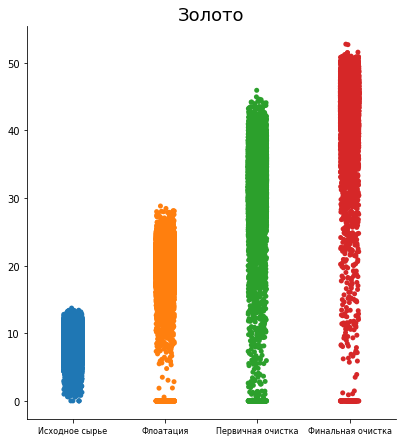

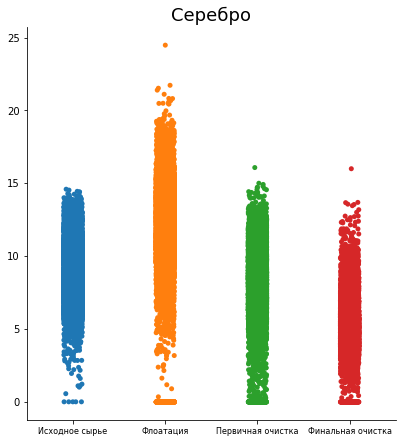

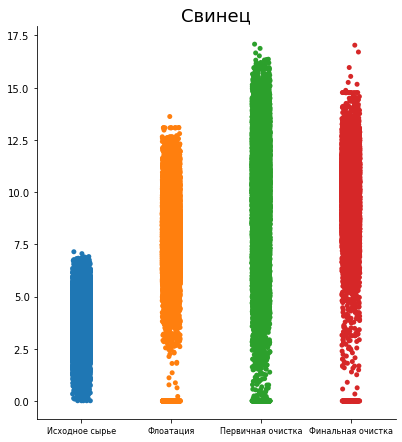

In [15]:
# отобразим концентрацию по этапам
au= sns.catplot(data=au_conc, height = 6)
au.set_xticklabels(['Исходное сырье','Флоатация','Первичная очистка', 'Финальная очистка'], fontsize=8)
plt.title("Золото", fontsize=18) 
plt.show()
ag= sns.catplot(data=ag_conc, height = 6)
ag.set_xticklabels(['Исходное сырье','Флоатация','Первичная очистка','Финальная очистка'], fontsize=8)
plt.title("Серебро", fontsize=18) 
plt.show()
pb= sns.catplot(data=pb_conc, height = 6)
pb.set_xticklabels(['Исходное сырье','Флоатация','Первичная очистка','Финальная очистка'], fontsize=8)
plt.title("Свинец", fontsize=18) 
plt.show()

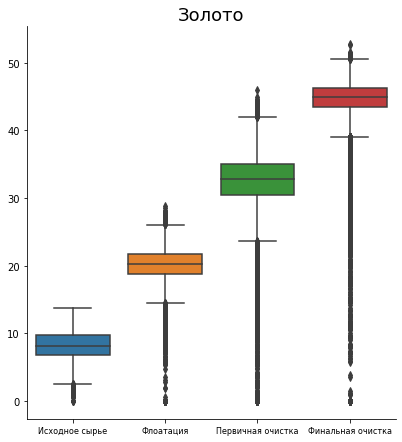

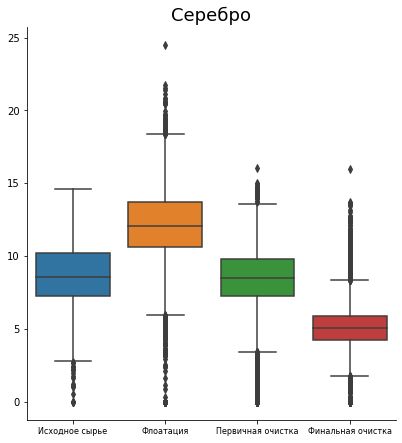

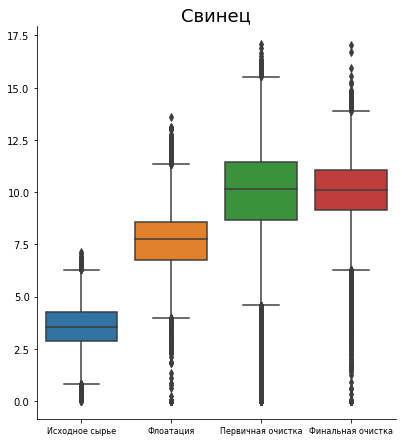

In [16]:
# отобразим распределение по этапам
au= sns.catplot(data=au_conc, height = 6, kind='box')
au.set_xticklabels(['Исходное сырье','Флоатация','Первичная очистка', 'Финальная очистка'], fontsize=8)
plt.title("Золото", fontsize=18) 
plt.show()
ag= sns.catplot(data=ag_conc, height = 6, kind='box')
ag.set_xticklabels(['Исходное сырье','Флоатация','Первичная очистка', 'Финальная очистка'], fontsize=8)
plt.title("Серебро", fontsize=18) 
plt.show()
pb= sns.catplot(data=pb_conc, height = 6, kind='box')
pb.set_xticklabels(['Исходное сырье','Флоатация','Первичная очистка', 'Финальная очистка'], fontsize=8)
plt.title("Свинец", fontsize=18) 
plt.show()

<b> Вывод: </b>

С каждым пройденным этапом очистки - доля золота увеличивается.

С каждым пройденным этапом очистки - доля серебра уменьшается.

Доля свинца практически не меняется на этапах очистки. Как видно из графика распределения, уменьшается разброс значений.

В целом, в данных имеется большое количество выбросов.

<b> Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной. </b>

<b> Размер гранул перед флоатацией на обучающей, и тестовой выборках </b>

In [17]:
# Создаем таблицу с размерами гранул перед флоатацией тестовой и обучающей выборок
rifs = pd.concat([train['rougher.input.feed_size'], test['rougher.input.feed_size']], axis=1) 
rifs.columns = ['train', 'test']
rifs.describe()

,train,test
count,14149.000000,5290.000000
mean,60.239856,55.952754
std,23.005310,19.080334
min,9.659576,0.046369
25%,48.966751,43.906504
50%,55.269784,50.846843
75%,66.007526,62.451165
max,484.967466,392.494040


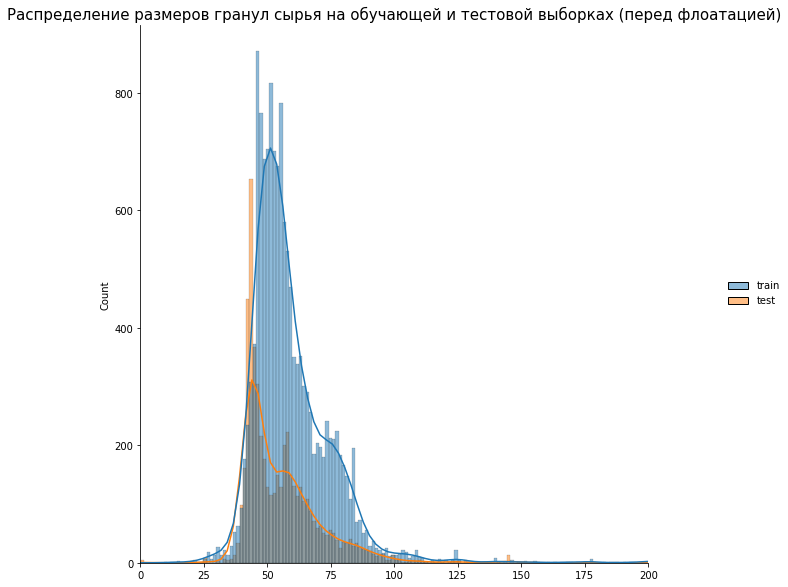

In [18]:
sns.displot(rifs, legend=True, kde=True, height=8)
plt.title('Распределение размеров гранул сырья на обучающей и тестовой выборках (перед флоатацией)', fontsize=15)
plt.xlim([0, 200])
plt.show()

<b> Размер гранул перед первичной очисткой на обучающей, и тестовой выборках </b>

In [19]:
pcifs = pd.concat([train['primary_cleaner.input.feed_size'], 
                                     test['primary_cleaner.input.feed_size']], axis=1) 
pcifs.columns = ['train', 'test']
pcifs.describe()

,train,test
count,14149.000000,5290.000000
mean,7.322310,7.266339
std,0.614062,0.610219
min,1.080000,5.650000
25%,6.960000,6.890000
50%,7.290000,7.250000
75%,7.700000,7.600000
max,10.470000,15.500000


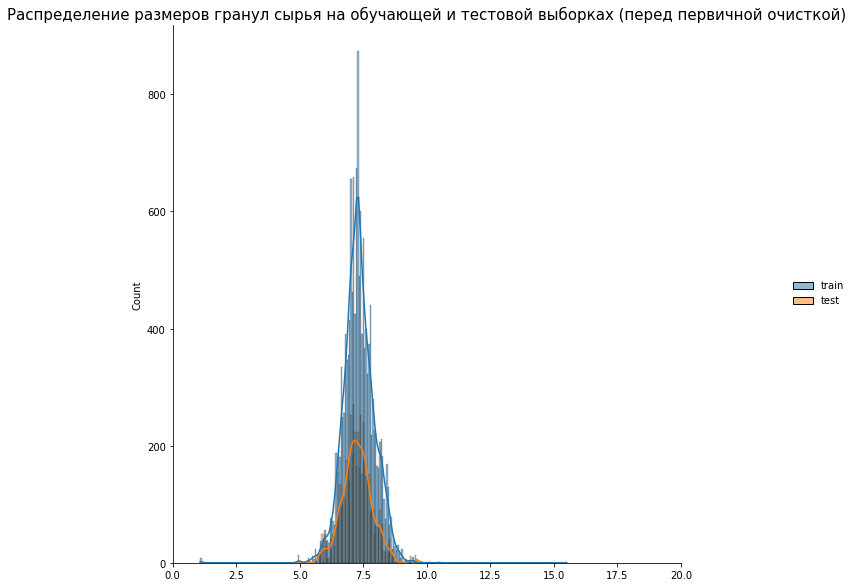

In [20]:
sns.displot(pcifs, legend=True, kde=True, height=8)
plt.title('Распределение размеров гранул сырья на обучающей и тестовой выборках (перед первичной очисткой)', fontsize=15)
plt.xlim([0, 20])
plt.show()

<b> Вывод: </b>
    
Распределения размеров гранул сырья на обучающей и тестовой выборках слабо отличаются, мы видим это по средним значениям, медианам и квартилям, так же наблюдаем на графиках, различия не должны влиять на оценку модели.

<b> Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. </b>

In [21]:
# Суммарная концентрация четырей веществ на каждой стадии
full['raw'] = full[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']].sum(axis=1)
full['rough concentrate'] = full[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']].sum(axis=1)
full['primary concentrate'] = full[['primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol']].sum(axis=1)
full['final concentrate'] = full[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']].sum(axis=1)

In [22]:
full[['raw', 'rough concentrate', 'primary concentrate', 'final concentrate']].describe()

,raw,rough concentrate,primary concentrate,final concentrate
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,57.320789,68.170865,60.764731,68.653624
std,7.212680,12.491279,10.017271,7.427536
min,0.040000,0.000000,0.000000,0.000000
25%,53.557679,66.012495,58.929364,67.932362
50%,57.594391,70.181495,62.497674,69.598444
75%,61.953459,74.356904,65.667336,71.368472
max,76.978947,88.140119,80.749343,80.210644


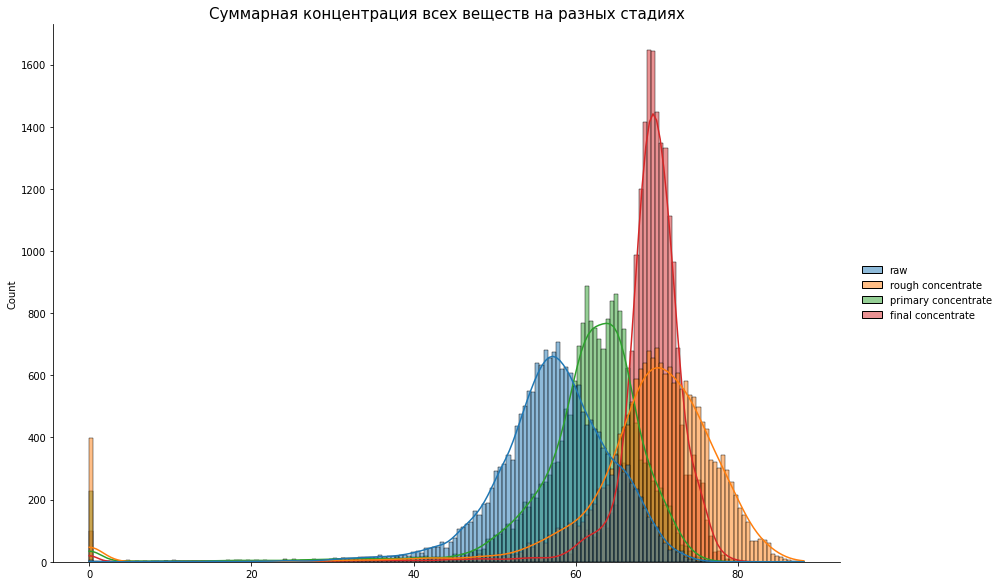

In [23]:
sns.displot(full[['raw', 'rough concentrate', 'primary concentrate', 'final concentrate']], legend=True, kde=True, height=8, aspect=1.5)  
plt.title('Суммарная концентрация всех веществ на разных стадиях', fontsize=15)
plt.show()

Суммарная концентрация всех веществ на разных стадиях для некоторых объектов равна 0,  имеет аномально большое количество таких значений судя по распределениям. С точки зрения технического процесса, таких объектов быть не может(не поступает руда на установку, получается что перегоняется воздух.
"0" данные стоит удалить, они могут негативно повлиять на работу будущей модели.

In [24]:
# сумма нулевых объектов
len(full[full['rough concentrate'] == 0]) + len(full[full['primary concentrate'] == 0]) + len(full[full['final concentrate'] == 0])

600

In [25]:
# Удалим объекты с нулевыми значениями.
full_good = full[
    (full['raw'] >  0) & 
    (full['rough concentrate'] > 0) & 
    (full['primary concentrate'] > 0) & 
    (full['final concentrate'] > 0)]

In [26]:
full_good[['raw', 'rough concentrate', 'primary concentrate', 'final concentrate']].describe()

,raw,rough concentrate,primary concentrate,final concentrate
count,18848.000000,18848.000000,18848.000000,18848.000000
mean,57.321500,69.585163,61.075460,69.011061
std,7.173910,7.761554,8.886193,5.539257
min,0.040000,0.040000,0.040000,0.040000
25%,53.525215,66.327918,59.006618,67.945265
50%,57.595439,70.314085,62.494760,69.600641
75%,61.962556,74.445415,65.636886,71.374700
max,76.978947,88.140119,80.749343,80.210644


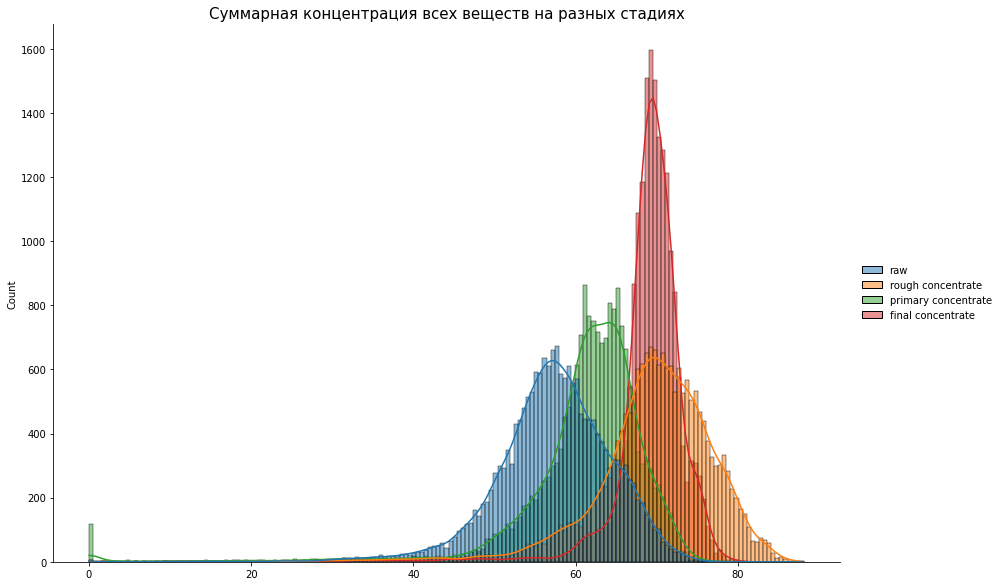

In [27]:
sns.displot(full_good[['raw', 'rough concentrate', 'primary concentrate', 'final concentrate']], legend=True, kde=True, height=8, aspect=1.5)  
plt.title('Суммарная концентрация всех веществ на разных стадиях', fontsize=15)
plt.show()

Обнаружен еще один выброс в primary concentrate < 1. Теоретически это возможно.

In [28]:
len(full[full['primary concentrate'] < 1])

228

228 объектов, выборка не пострадает если убрать такое количество аномалий. А для модели это может пойти на пользу.

In [29]:
full_good = full_good[full_good['primary concentrate'] >  1]

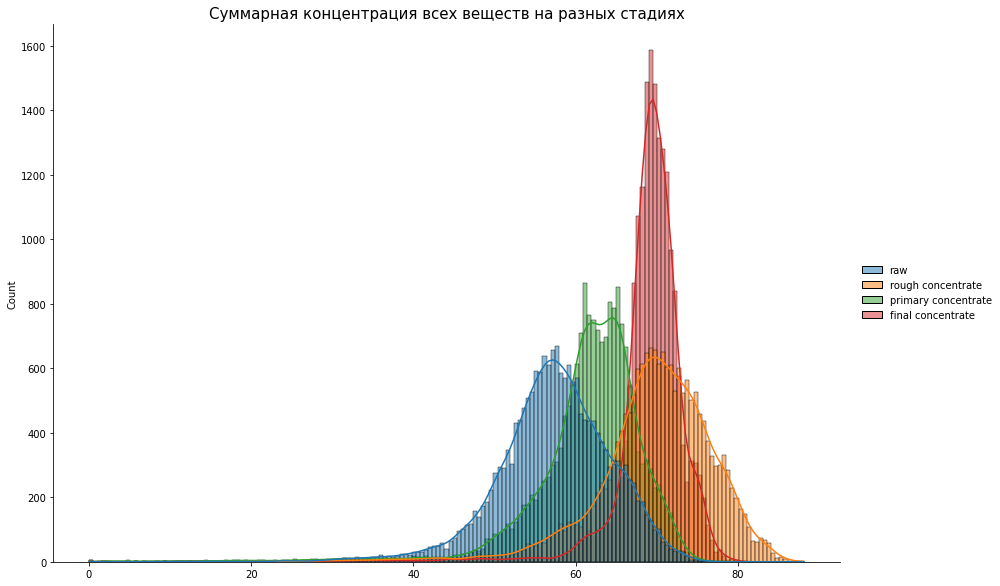

In [30]:
sns.displot(full_good[['raw', 'rough concentrate', 'primary concentrate', 'final concentrate']], legend=True, kde=True, height=8, aspect=1.5)  
plt.title('Суммарная концентрация всех веществ на разных стадиях', fontsize=15)
plt.show()

Видимых на графике аномалий больше нет.
Чтобы не искажать дальнейшую модель удалим найденные объекты из обучающей и тестовой выборок.

In [31]:
train_good = train[train['date'].isin(full_good['date'])]
test_good = test[test['date'].isin(full_good['date'])]

In [32]:
# удаление пропусков
train_good.dropna(inplace=True) 
test_good.dropna(inplace=True) 

<b> Вывод: </b>

Проанализировали изменения концентрации металлов на разных этапах: доля золота увеличивается, доля серебра незначительно уменьшается.

Проанализировали распределения размеров гранул на обучающей и тестовой выборке: они распределяются с незначительными отличиями, что не влияет на оценку модели.

Проанализировали суммарную концентрацию всех веществ на разных стадиях. Были обнаружены аномалии. Убрали найденные аномалии из обучающей и тестовой выборок.

## Модель

<b> Напишите функцию для вычисления итоговой sMAPE. </b>

In [33]:
def smape(target, predictions):
    numerator = abs(predictions - target)
    denominator = (abs(target) + abs(predictions)) / 2
    summa = (numerator / denominator).sum()
    smape = 1 / len(target) * summa * 100
    return smape

In [34]:
def total_smape (smape_rougher, smape_final):
    total_smape = 0.25 * smape_rougher + 0.75 * smape_final
    return total_smape

<b> Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы. </b>

In [35]:
# Разделим датафреймы на features и target

# train
target_rougher_train = train_good['rougher.output.recovery']
target_final_train = train_good['final.output.recovery']
features_train = train_good.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

# test
target_rougher_test = test_good['rougher.output.recovery']
target_final_test = test_good['final.output.recovery']
features_test = test_good.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

In [36]:
# Маштабируем признаки
numeric = features_train.columns
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

<b> Обучим и оценим модель линейной регрессии </b>

In [37]:
scorer = make_scorer(smape, greater_is_better=False) 
    
cross_val_score_rougher = cross_val_score(LinearRegression(),
                                          features_train,
                                          target_rougher_train,
                                          cv=4, scoring=scorer).mean()
cross_val_score_final = cross_val_score(LinearRegression(),
                                        features_train,
                                        target_final_train,
                                        cv=4, scoring=scorer).mean()
total_smape_result = total_smape(cross_val_score_rougher, cross_val_score_final)
print('Итоговое sMAPE:', -total_smape_result)

Итоговое sMAPE: 10.023383012237183


<b> Обучим и оценим модель регрессии дерева решений </b>

In [38]:
cross_val_score_rougher = cross_val_score(DecisionTreeRegressor(random_state=12345),
                                          features_train,
                                          target_rougher_train,
                                          cv=4, scoring=scorer).mean()
cross_val_score_final = cross_val_score(DecisionTreeRegressor(random_state=12345),
                                        features_train,
                                        target_final_train,
                                        cv=4, scoring=scorer).mean()
total_smape_result = total_smape(cross_val_score_rougher, cross_val_score_final)
print('Итоговое sMAPE:', -total_smape_result)

Итоговое sMAPE: 15.626864193636361


<b> Обучим и оценим модель случайного леса </b>

In [39]:
dd = dict()
de = dict()
for depth in range(3, 5): #сократил поиск, прогнав заранее, брал другие диапазоны
    
    for estimator in range(18, 21):
        
        model = RandomForestRegressor(random_state=12345, 
                                       n_estimators=estimator, 
                                       max_depth=depth)
        
        scorer = make_scorer(smape, greater_is_better=False) 
    
        cross_val_score_rougher = cross_val_score(model, features_train, target_rougher_train, cv=4, scoring=scorer).mean()
        cross_val_score_final = cross_val_score(model, features_train, target_final_train, cv=4, scoring=scorer).mean()

        total_smape_result = total_smape(cross_val_score_rougher, cross_val_score_final)
        dd[depth] = total_smape_result
        de[estimator] = total_smape_result
        print('Итоговое sMAPE:', -total_smape_result, 'Max depth', depth,'n_estimators', estimator)
best_max_depth = [key for key in dd if dd[key] == max(dd.values())] 
best_max_n_estimators = [key for key in de if de[key] == max(de.values())]
depth_best = int(''.join(map(str, best_max_depth)))
estimator_best = int(''.join(map(str, best_max_n_estimators)))
print('лучшая модель при Max depth', best_max_depth, 'и n_estimators', best_max_n_estimators)  


Итоговое sMAPE: 9.331373022743719 Max depth 3 n_estimators 18
Итоговое sMAPE: 9.298134310532493 Max depth 3 n_estimators 19
Итоговое sMAPE: 9.333949457549764 Max depth 3 n_estimators 20
Итоговое sMAPE: 9.475117705163381 Max depth 4 n_estimators 18
Итоговое sMAPE: 9.43865708445602 Max depth 4 n_estimators 19
Итоговое sMAPE: 9.478135936352299 Max depth 4 n_estimators 20
лучшая модель при Max depth [3] и n_estimators [19]


Случайный лес показывает лучшую метрику, используем его для тестовой выборки

<b> Проверка модели случайного леса на тестовой выборке </b>

In [40]:
model_final = RandomForestRegressor(random_state=12345, 
                                       n_estimators=estimator_best, 
                                       max_depth=depth_best)

model_final.fit(features_train, target_rougher_train)
predictions_rougher = model_final.predict(features_test)

model_final.fit(features_train, target_final_train)
predictions_final = model_final.predict(features_test)

smape_rougher = smape(target_rougher_test, predictions_rougher)
smape_final = smape(target_final_test, predictions_final)

print('Итоговое sMAPE:', total_smape(smape_rougher, smape_final))

Итоговое sMAPE: 7.072378887706031


<b> Проверка модели на адекватность </b>

In [41]:
# Создадим константную модель с помошью DummyRegressor. 
# С параметром strategy='mean' -  всегда предсказывает среднее значение обучающей выборки.
model = DummyRegressor(strategy='mean')

model.fit(features_train, target_rougher_train)
predictions_rougher = model.predict(features_test)

model.fit(features_train, target_final_train)
predictions_final = model.predict(features_test)

smape_rougher= smape(target_rougher_test, predictions_rougher)
smape_final= smape(target_final_test, predictions_final)

print('Итоговое sMAPE', total_smape(smape_rougher, smape_final))

Итоговое sMAPE 7.7753353273352666


<b> Вывод: </b>

Лучший результат показала модель случайного леса, в сравнении разных моделей с использованием методов кросс валидации.

Обученная модель на тестовой выборке показывает метрику лучше константной модели, проверка на адекватность пройдена.